Project Members: Sidonia Summers, Rowan Wilson, Ben Calhoun, Abigail Simanjuntak

Country Happiness Project

CS3540: Machine Learning

Mounting to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing necessary libraries for the project

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from past.builtins import xrange
from scipy.special import expit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

%matplotlib inline

Adding the google path

In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['data']


Loading in the data

In [ ]:
path1 = GOOGLE_DRIVE_PATH + 'data/WorldHappinessReport2024.csv'
df_world_happiness = pd.read_csv(path1)

path2 = GOOGLE_DRIVE_PATH + 'data/CountryComparisonLargeDataset.csv'
df_country_comparison = pd.read_csv(path2)


#display part of the dataset.
display(df_world_happiness.head())
display(df_country_comparison.head())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,United States,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


Exploring, cleaning, etc the world happiness dataset

Cleaning: Remove rows with missing values Overview of each feature, ensure all values make sense Removing whitespace Correcting mispelled words Detecting and fixing outliers Fixing formatting errors

Six countries we will predict:

Usa
Russia
China
India
Canada
Australia

In [ ]:
df_world_happiness.info()
df_world_happiness.shape
# missing values in "Log GDP per capita", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity","Perceptions of corruption",
# "Positive affect", and "Negative affect"

# renameing columns
df_world_happiness.rename(columns={'Country name': 'Country', 'year': 'Year'}, inplace=True)
df_world_happiness.info()

df_world_happiness = df_world_happiness[df_world_happiness['Country'].isin(['United States', 'Canada','India','Russia','Australia','China'])]
df_world_happiness.info()
unique_values = df_world_happiness['Country'].unique()
print(unique_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
<class 'pa

Visualizing the columns to check for any outliers

In [ ]:
display(df_country_comparison.head())

# rename USA to United States to match the world happiness dataset

df_country_comparison['Country'] = df_country_comparison['Country'].replace('USA', 'United States')

#stripping white space
df_world_happiness.columns = df_world_happiness.columns.str.strip()
df_country_comparison.columns = df_country_comparison.columns.str.strip()

merged_df = pd.merge(df_world_happiness, df_country_comparison, on=['Country', 'Year'], how='inner')

merged_df.head()
merged_df.shape

merged_df.info()

# missing values in
# social support
# freedom to make life choices
# perceptions of corruption
# generosity

,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,United States,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  104 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    101 non-null    float64
 7   Generosity                                      102 non-null    float64
 8   Perceptions of corruption                       89 non-null     float64
 9   Positive affect                            

In [ ]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Generosity'].median()
median_value = int(median_value)
merged_df['Generosity']= merged_df['Generosity'].fillna(median_value)

In [ ]:
# Social support filling in the missing data
median_value = merged_df['Social support'].median()
median_value = int(median_value)
merged_df['Social support']= merged_df['Social support'].fillna(median_value)

In [ ]:
# Perceptions of corruption filling in the missing data
median_value = merged_df['Perceptions of corruption'].median()
median_value = int(median_value)
merged_df['Perceptions of corruption']= merged_df['Perceptions of corruption'].fillna(median_value)

In [ ]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Freedom to make life choices'].median()
median_value = int(median_value)
merged_df['Freedom to make life choices']= merged_df['Freedom to make life choices'].fillna(median_value)

In [ ]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  106 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    106 non-null    float64
 7   Generosity                                      106 non-null    float64
 8   Perceptions of corruption                       106 non-null    float64
 9   Positive affect                            

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2014.462264,6.114565,10.089651,0.829477,66.060047,0.791166,0.051330,0.546397,0.690947,0.236934,...,11.065849,35.280472,82.521698,38.206887,5.005849,61.019717,474.921698,55.073774,92.285377,69.885755
std,5.215681,1.185722,0.902424,0.168624,4.565608,0.200702,0.190152,0.301657,0.081433,0.065683,...,5.855160,27.231909,70.832695,21.017962,1.341535,5.626838,290.923446,18.618202,65.405531,10.521994
min,2005.000000,3.248770,8.141137,0.000000,55.860001,0.000000,-0.312144,0.000000,0.479760,0.111518,...,1.910000,9.050000,26.850000,6.730000,3.430000,47.700000,95.300000,28.560000,15.280000,57.240000
25%,2010.000000,5.144548,9.395759,0.787280,62.369999,0.745741,-0.106017,0.392448,0.617724,0.191014,...,9.327500,10.977500,30.015000,12.970000,3.760000,58.665000,250.750000,40.000000,25.297500,63.452500
50%,2014.500000,6.332818,10.454458,0.902833,66.689999,0.849600,0.079660,0.616672,0.711184,0.233196,...,10.090000,23.370000,36.525000,45.055000,4.760000,62.025000,395.350000,54.820000,90.220000,67.400000
75%,2019.000000,7.192138,10.794382,0.928877,70.514997,0.911518,0.212246,0.780634,0.759562,0.268029,...,12.360000,64.655000,121.500000,55.267500,5.600000,65.435000,792.200000,72.647500,150.712500,70.885000
max,2023.000000,7.650346,11.089293,0.967892,71.500000,0.957306,0.363977,0.953602,0.811577,0.466336,...,22.970000,83.600000,230.340000,62.940000,7.870000,69.230000,943.200000,80.850000,185.320000,96.600000


In [ ]:
# Select which columns to exclude
X = merged_df.drop(columns=['Positive affect','Country','Life Ladder','Log GDP per capita','Year','Negative affect','Perceptions of corruption'])
y = merged_df['Positive affect'] > merged_df['Positive affect'].median()  # Binary target

                                           Feature  Importance
35                     Corruption Perception Index    0.161626
11         Healthcare Expenditure per Capita (USD)    0.131617
36                          Freedom of Press Index    0.111793
16                         Smartphone Adoption (%)    0.080743
26                   Human Development Index (HDI)    0.076202
25                      Public Transport Usage (%)    0.056559
14               Education Expenditure as % of GDP    0.054728
5                          GDP per Capita (in USD)    0.052627
6                               Inflation Rate (%)    0.038110
3                                       Generosity    0.033510
15                        Internet Penetration (%)    0.030792
9                             Urban Population (%)    0.027353
27                           Gender Equality Index    0.026655
23                              Number of Airports    0.016147
2                     Freedom to make life choices    0

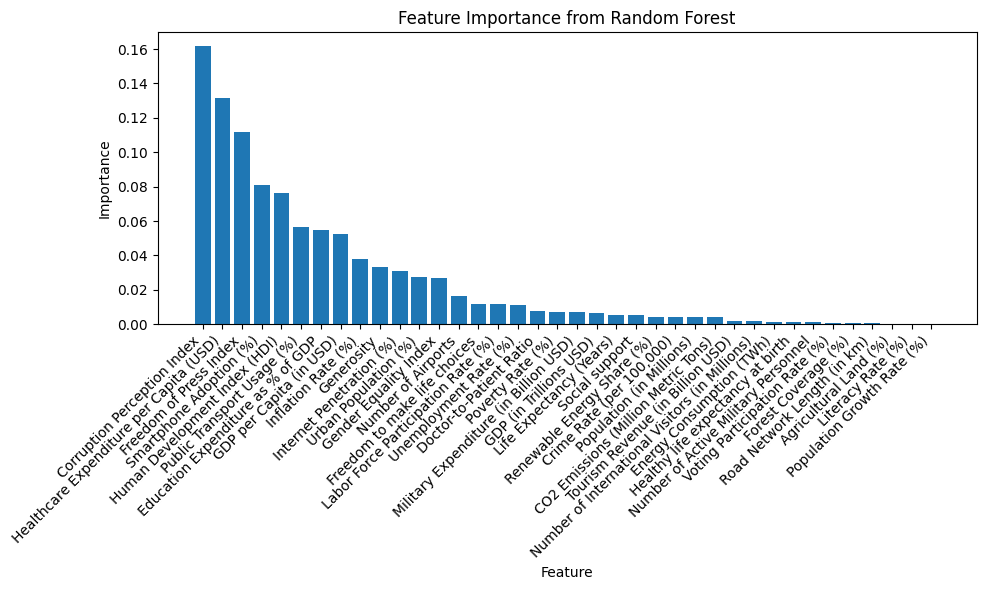

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Use columns from training data
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Get the top 6 most important features
top_6_features = feature_importances['Feature'].head(6).tolist()

# Create a variable to store the selected features
selected_features = top_6_features

selected_features

['Corruption Perception Index',
 'Healthcare Expenditure per Capita (USD)',
 'Freedom of Press Index',
 'Smartphone Adoption (%)',
 'Human Development Index (HDI)',
 'Public Transport Usage (%)']

In [ ]:
# Importing necessary libraries for the decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import classification_report, accuracy_score

# Selecting features and target
X = merged_df[selected_features]
y = merged_df['Positive affect'] > merged_df['Positive affect'].median()  # Example target: above/below median happiness

# Re-split data into training and testing sets using selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Visualizing the Decision Tree
export_graphviz(
    tree_clf,
    out_file="decision_tree.dot",
    feature_names=X.columns,
    class_names=['Low Happiness', 'High Happiness'],
    rounded=True,
    filled=True
)

# Convert to .png using graphviz (if graphviz is installed)
with open("decision_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("decision_tree", format="png", cleanup=True)

# Model Evaluation
y_pred = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.88      0.88        16
        True       0.88      0.88      0.88        16

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.88        32
weighted avg       0.88      0.88      0.88        32



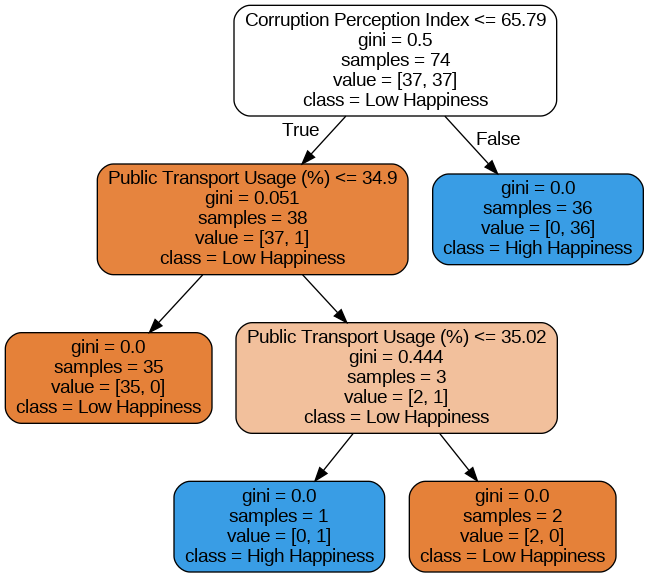

In [ ]:
from IPython.display import Image, display

# Display the PNG file in Google Colab
display(Image('decision_tree.png'))